In [2]:
import wget
from zipfile import ZipFile as zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
download_file = wget.download('https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip')

-1 / unknown

In [4]:
with  zipfile(download_file, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
df = pd.read_csv('./SeoulBikeData.csv',encoding='unicode_escape')

## Data Inspection

In [7]:
# First rows inspection
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# Data Types
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:
# Missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Numerical Statistics
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Inspect categorical columns
df_copy = df.copy()
categorical = df_copy.dtypes[df_copy.dtypes == 'object'].index
df_categorical = df_copy[categorical].drop(columns='Date')

for col in df_categorical:
    print(f'\nUnique values in col: {col}')
    display(df_categorical[col].value_counts())


Unique values in col: Seasons


Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64


Unique values in col: Holiday


Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64


Unique values in col: Functioning Day


Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

## Data Cleaning

In [13]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [14]:
cols = df.columns
cols

Index(['date', 'rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day'],
      dtype='object')

In [15]:
def clean_columns(df):
    cleaned_cols = []
    
    for col in df.columns:
        clean_col = col.lower()
        clean_col = clean_col.replace('(', '').replace(')', '').replace('%','').replace('/','').replace('°',' ')
        clean_col = clean_col.replace(' ','_')
        cleaned_cols.append(clean_col)
        
    df.columns = cleaned_cols

    # clean categorical column data
    categorical = df.dtypes[df.dtypes == 'object'].index

    for col in categorical:
        df[col] = df[col].str.lower().str.replace(' ','_')

    # clean target variable
    df.functioning_day = (df.functioning_day == 'yes').astype('int')

    df.date = pd.to_datetime(df.date, format='%d/%m/%Y')
    return df
clean_columns(df)

,date,rented_bike_count,hour,temperature_c,humidity,wind_speed_ms,visibility_10m,dew_point_temperature_c,solar_radiation_mjm2,rainfallmm,snowfall_cm,seasons,holiday,functioning_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,winter,no_holiday,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,winter,no_holiday,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,winter,no_holiday,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,winter,no_holiday,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,winter,no_holiday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,autumn,no_holiday,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,autumn,no_holiday,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,autumn,no_holiday,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,autumn,no_holiday,1


In [16]:
df.functioning_day.value_counts()

functioning_day
1    8465
0     295
Name: count, dtype: int64

## Data Preprocessing
#### Create temporal Features
- Month
- Day
- Day Of Week
## Create Cyclic features for hour to represent hourly cyclic nature
- Hour sin representation
- Hour cos representation

In [56]:
# Temporal features
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

In [58]:
# cyclic features
df['hour_sin'] = np.sin(2*np.pi*(df.hour/24))
df['hour_cos'] = np.cos(2*np.pi*(df.hour/24))

## Exploratory Data Analysis

In [18]:
numerical_cols = list(df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index)
numerical_cols

['rented_bike_count',
 'hour',
 'temperature_c',
 'humidity',
 'wind_speed_ms',
 'visibility_10m',
 'dew_point_temperature_c',
 'solar_radiation_mjm2',
 'rainfallmm',
 'snowfall_cm']

Text(0.5, 1.0, 'Bike Rentals by season')

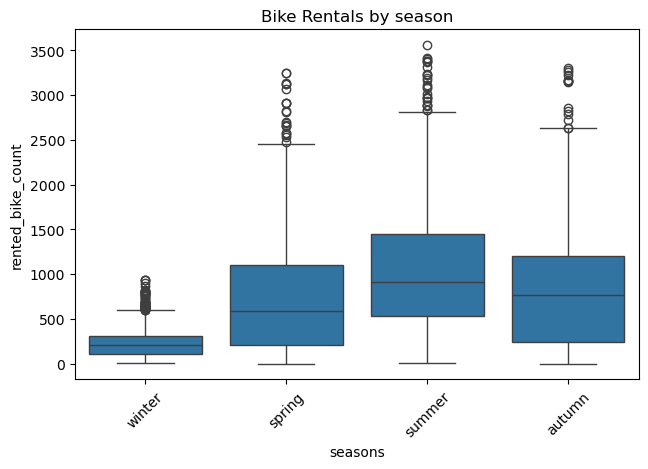

In [102]:
# Rented Bike count per season
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='seasons',y='rented_bike_count')
plt.xticks(rotation=45)
plt.title('Bike Rentals by season')

- Summer has the highest median rentals (900) and widest spread.
- Spring and Autumn show similar patterns with moderate rentals, 600 and 700 respectively.
- Winter has significantly lower rentals (250 bikes) and the smallest spread

**Key Insights**
- Seasonality has a strong impact on bike rentals
- Summer shows the highest variability in rental numbers
- Winter has more consistent rental patterns
- All seasons show outliers at the on the higher end, indicating occassional peaks in demand


Text(0, 0.5, 'Average rentals')

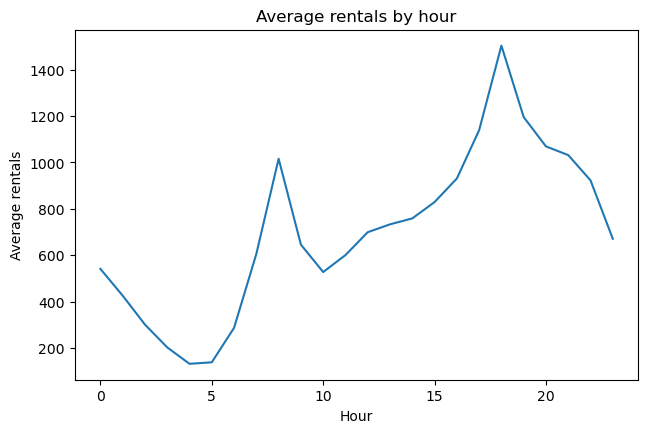

In [100]:
# Average rentals per hour
hourly_avg = df.groupby('hour')['rented_bike_count'].mean()
plt.figure(figsize=(16,10))
plt.subplot(2,2,3)
hourly_avg.plot()
plt.title('Average rentals by hour')
plt.xlabel('Hour')
plt.ylabel('Average rentals')

**Key Insights**
1. Peak Hours
   - Morning peak - Around 8:00am with about 1000 rental bikes
   - Evening Peak - Around 6:00pm with about 1500 bikes
   - The evening peak is higher than the morning peak
   - These peaks clearly align with commuting hours
2. Low Usage Periods
   - Lowest usage - From 4-5 am with around 150 rentals
   - A gradual decrese from midnight to early morning, representing a quiet period.
3. Daily Pattern
   - M shape pattern showing 2 major peaks
   - Mid-day plateau between 10-15 hours showing steady moderate usage 

Text(0.5, 1.0, 'Temperature Impact on Bike Rentals')

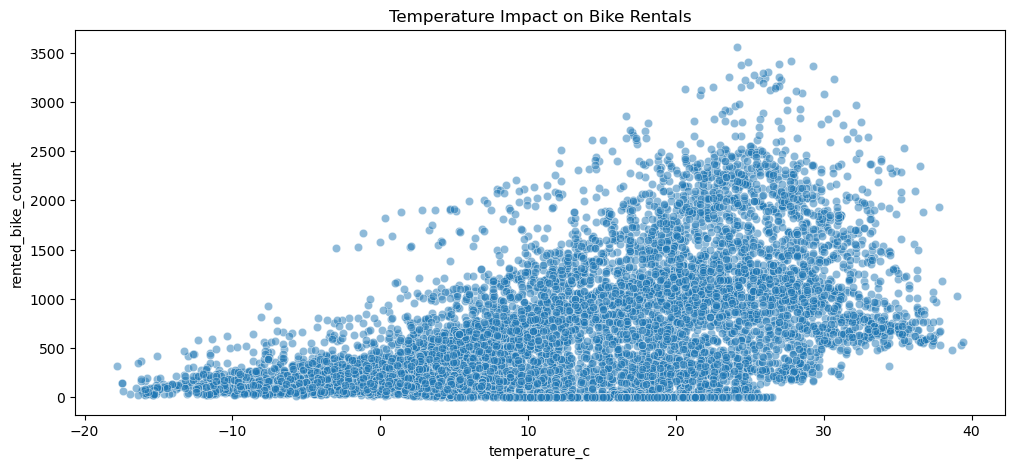

In [177]:
# Temperature vs Rentals

plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='temperature_c',y='rented_bike_count',alpha=0.5)
plt.title('Temperature Impact on Bike Rentals')

Key Insights
- Clear positive correlation between temperature and rentals
- Non linear relationship, where rentals increase more rapidly between 0-20 degrees
- Highest rental activities occur around 20 to 30 degrees, suggesting other factors affect rentals

In [133]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature_c', 'humidity',
       'wind_speed_ms', 'visibility_10m', 'dew_point_temperature_c',
       'solar_radiation_mjm2', 'rainfallmm', 'snowfall_cm', 'seasons',
       'holiday', 'functioning_day', 'month', 'day', 'dayofweek', 'hour_sin',
       'hour_cos'],
      dtype='object')

#### Weather Impact Analysis

Text(0.5, 1.0, 'Solar Radiation (MJ/m2) vs Rentals')

<Figure size 1500x500 with 0 Axes>

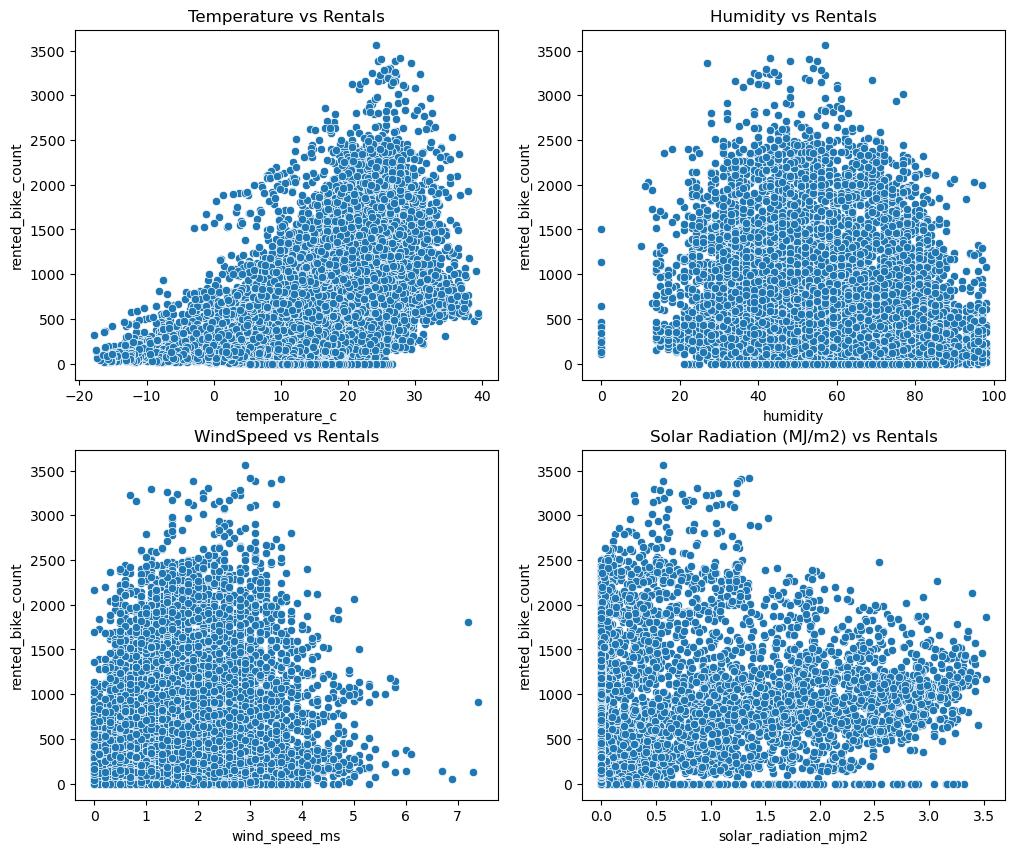

In [139]:
# Weather conditions combined analysis
plt.figure(figsize=(15,5))
fig,axes = plt.subplots(2,2,figsize=(12,10))

# Temparature
sns.scatterplot(data=df,x='temperature_c',y='rented_bike_count',ax=axes[0,0])
axes[0,0].set_title('Temperature vs Rentals')

# Humidity
sns.scatterplot(data=df,x='humidity',y='rented_bike_count',ax=axes[0,1])
axes[0,1].set_title('Humidity vs Rentals')

# Wind Speed
sns.scatterplot(data=df,x='wind_speed_ms',y='rented_bike_count',ax=axes[1,0])
axes[1,0].set_title('WindSpeed vs Rentals')

# Wind Speed
sns.scatterplot(data=df,x='solar_radiation_mjm2',y='rented_bike_count',ax=axes[1,1])
axes[1,1].set_title('Solar Radiation (MJ/m2) vs Rentals')

#### Holiday Impact Analysis

Text(0.5, 1.0, 'Rental patterns: Holiday vs Non-Holiday')

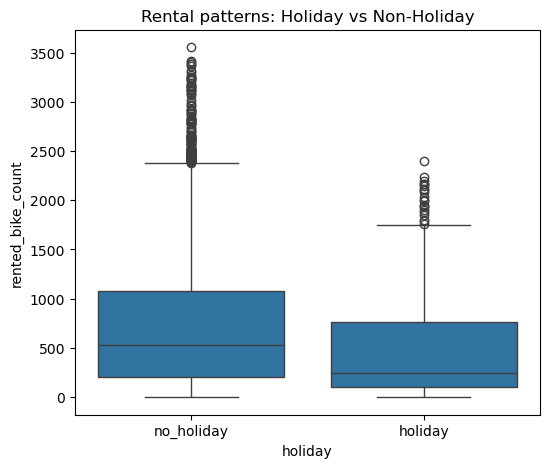

In [147]:
# Holiday vs Non-holiday comparison

plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='holiday',y='rented_bike_count')
plt.title('Rental patterns: Holiday vs Non-Holiday')

Observations
- Non holiday rentals show a higher median ~500 rentals, with a larger interquatile range. There are sights of higher values (up to 3500) with more outliers at higher values.
- Holiday rentals show lower median rentals ~250 bikes, with a smaller interquartile range, with fewer outliers

Text(0.5, 1.0, 'Hourly Rental Patterns: Holiday vs Non-Holiday')

<Figure size 1200x600 with 0 Axes>

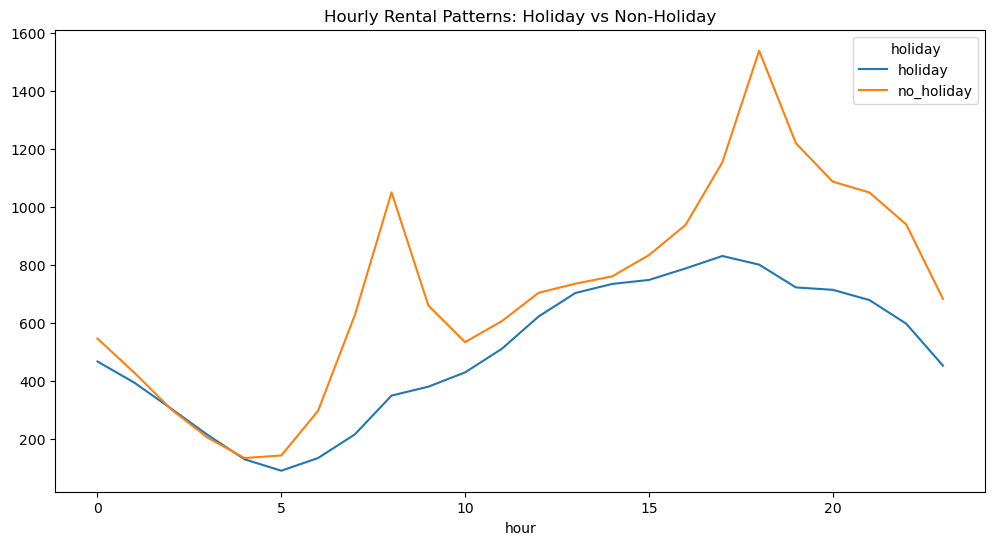

In [183]:
# Hpurly rental patterns: Holiday vs Non holiday

plt.figure(figsize=(12,6))
holiday_hourly = df.pivot_table(
    index='hour',
    columns='holiday',
    values='rented_bike_count',
    aggfunc='mean'
)
holiday_hourly.plot(
    figsize=(12,6)
)
plt.title('Hourly Rental Patterns: Holiday vs Non-Holiday')

In [165]:
df_num = df.copy()

numerical_cols = df_num.select_dtypes(include=[np.number]).columns
df_numerical = df_num[numerical_cols].drop(columns=['hour_cos','hour_sin'])

Insights

- Non-holidays show two distinct peaks (commuting hours), morning peak between 8 and 9 am ~1000 rentals, Evening peak around 6pm ~1500
- Holidays, show no clear commuting peaks, more less a gradual increase through the day. Peak around 5 to 6pm but much lower than non holidays

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix Numerical Features')

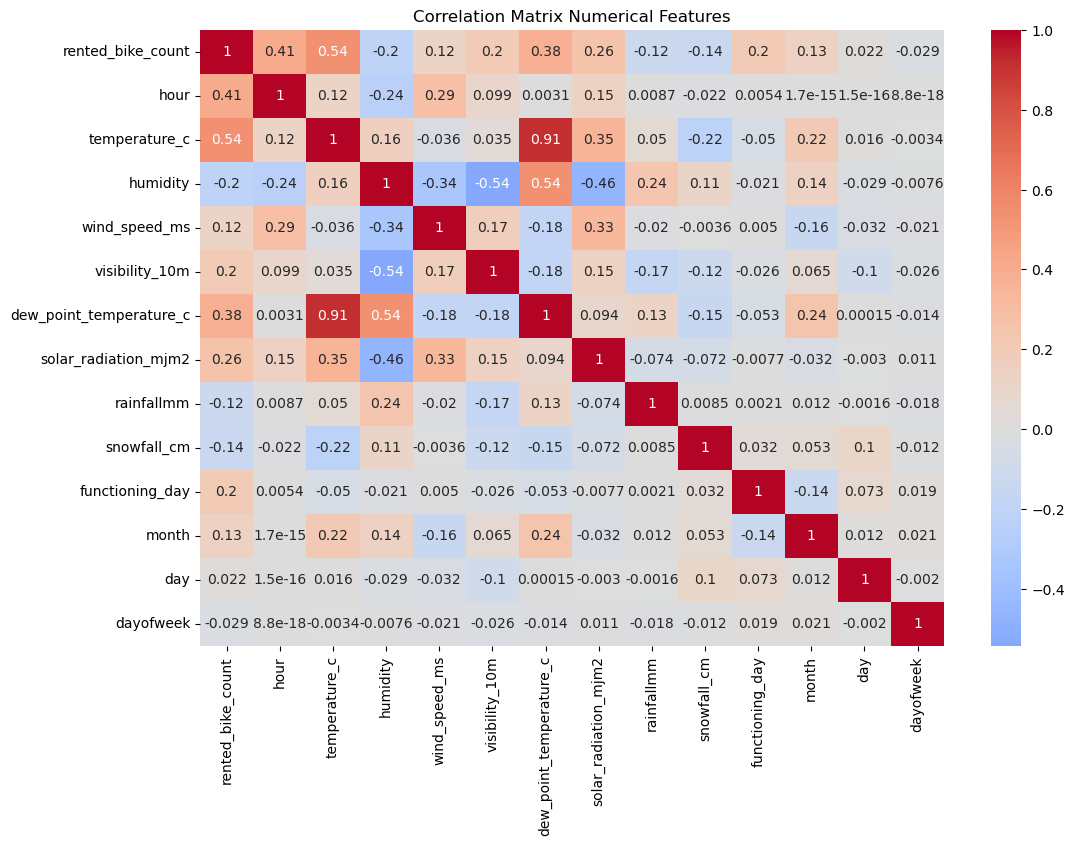

In [168]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numerical.corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Matrix Numerical Features')

Strongest correlation with Bike Rentals
- Temperature - 0.54, Strongest positive correlation - People rent more bikes in warmer weather
- Hour - 0.42, Strong positive correlation - Indicating clear daily plans.
- Dew Point - 0.38, moderate positive correlation
- Solar radioation - 0.26, Weak positive correlation - more rentals during sunny conditions
- Humidity - -0.2, Weak negative correlation - fewer rentals when humidity is high.

Further Insights
- Temperature and Dew point show a very strong correlation (0.91)
    - This suggests multicollinearity which might neccessitate dropping one of them. Since Temperature has a stronger correlation with the rentals, I opt to keep it.
- Humidity and visibility show a strong negative correlation (-0.54), meaning the higher the humidity the the lower the visibility.

#### Distribution analysis

Text(0.5, 1.0, 'Distribution of Bike Rentals')

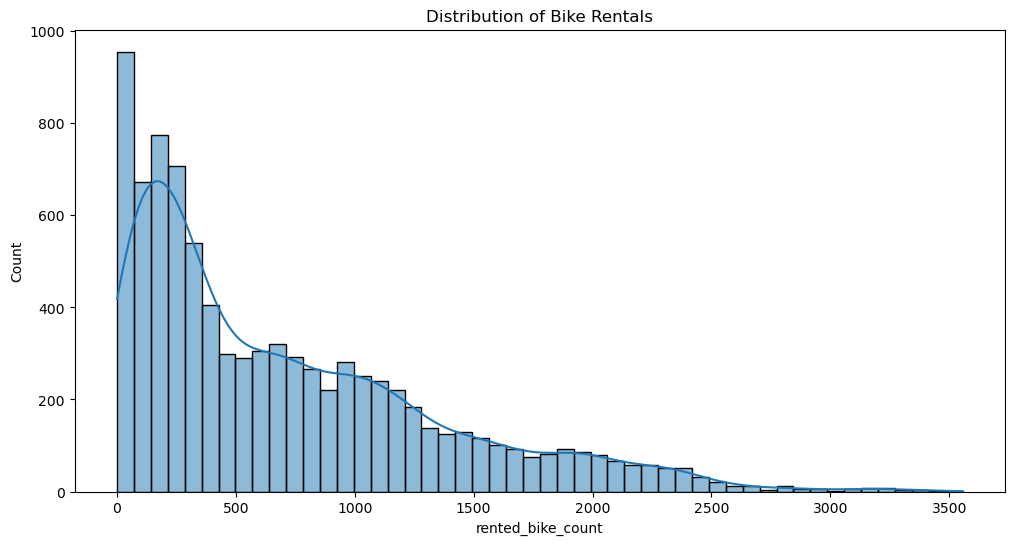

In [187]:
# Distribution of target variable
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='rented_bike_count',bins=50,kde=True)
plt.title('Distribution of Bike Rentals')

Observations
- Right skewed with many low rental counts, with a long tail towards higher rental counts.
- This is not normally distributed

Text(0.5, 1.0, 'Distribution of Log-Transformed Bike Rentals')

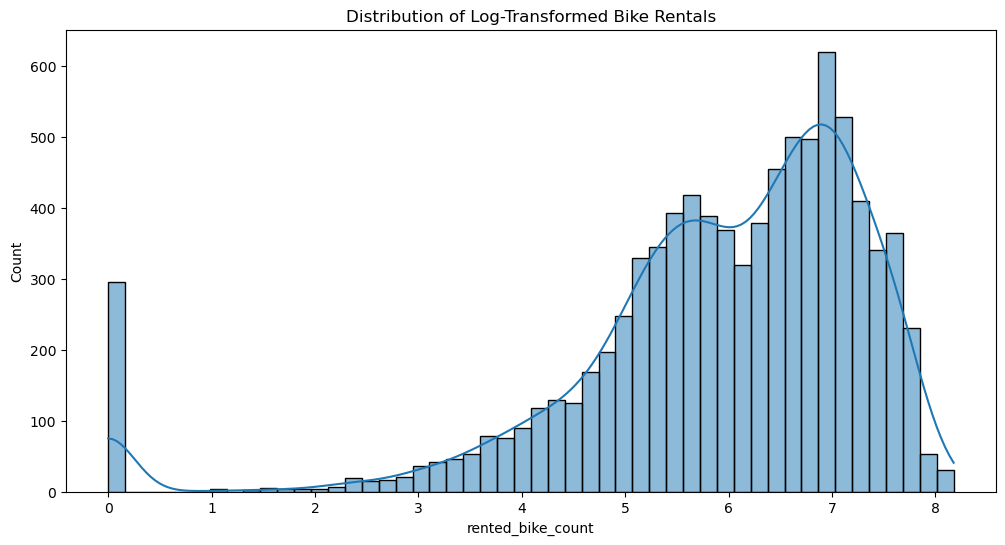

In [189]:
# Log Transformation to check if more normally distributed
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=np.log1p(df.rented_bike_count),bins=50,kde=True)
plt.title('Distribution of Log-Transformed Bike Rentals')

A more symetric but still not perfectly normal, with better speared of values

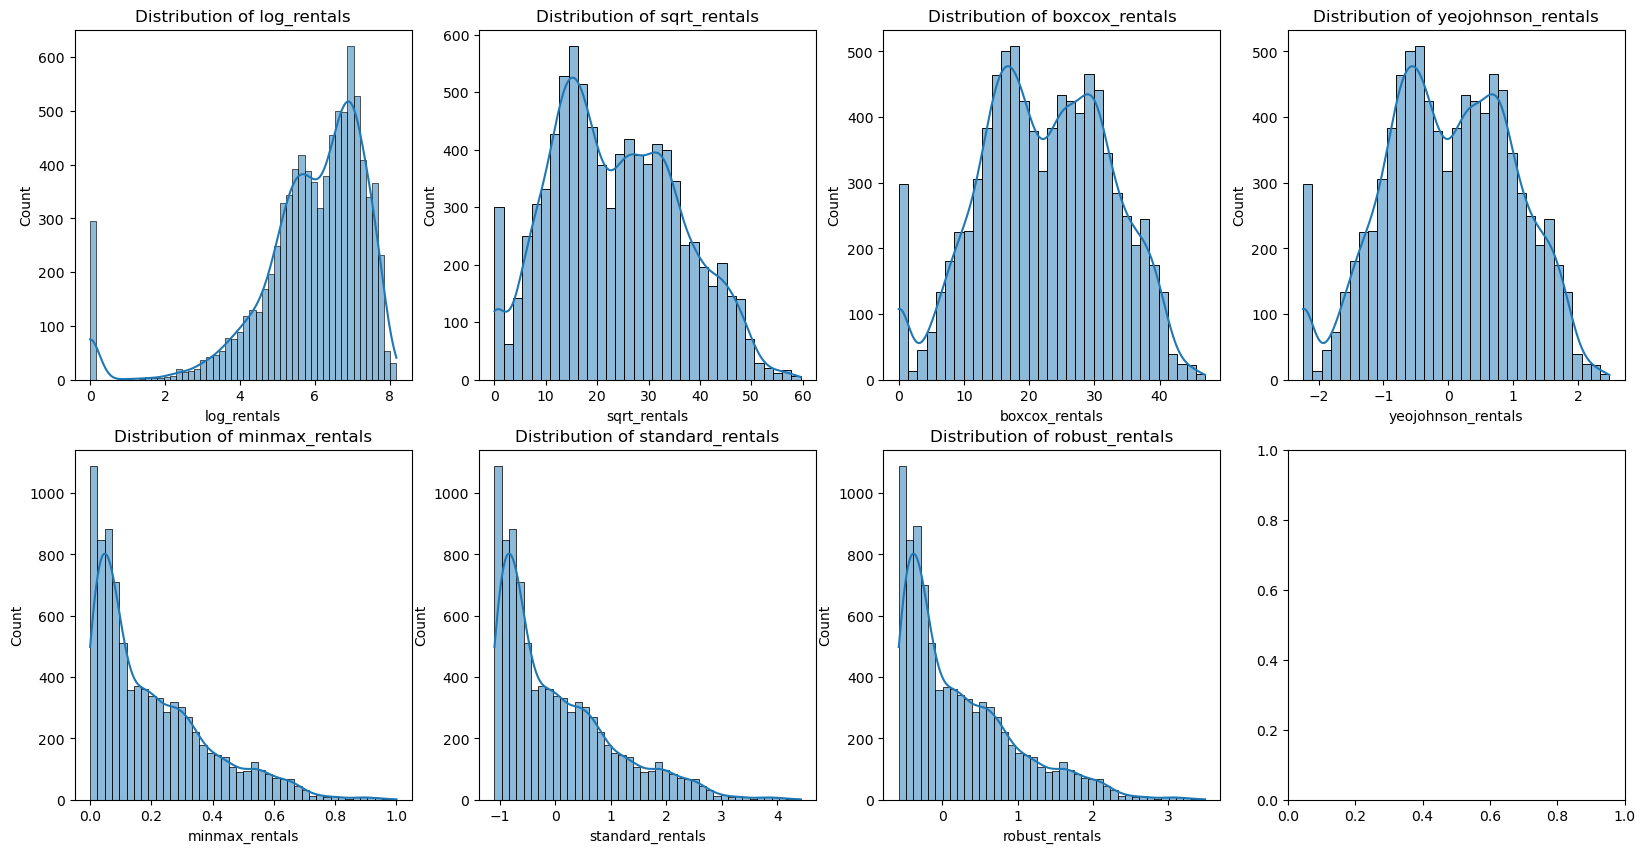

In [193]:
# 1. Log Transformation (already shown but can be improved)
df['log_rentals'] = np.log1p(df['rented_bike_count'])  # log1p to handle zero values

# 2. Square Root Transformation (good for right-skewed count data)
df['sqrt_rentals'] = np.sqrt(df['rented_bike_count'])

# 3. Box-Cox Transformation
from scipy import stats
df['boxcox_rentals'], lambda_param = stats.boxcox(df['rented_bike_count'] + 1)  # +1 to handle zeros

# 4. Yeo-Johnson Transformation (can handle negative values)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['yeojohnson_rentals'] = pt.fit_transform(df[['rented_bike_count']])

# 5. Min-Max Scaling (to [0,1] range)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['minmax_rentals'] = scaler.fit_transform(df[['rented_bike_count']])

# 6. Standard Scaling (z-score normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['standard_rentals'] = scaler.fit_transform(df[['rented_bike_count']])

# 7. Robust Scaling (handles outliers better)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['robust_rentals'] = scaler.fit_transform(df[['rented_bike_count']])

# Check the distributions
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
transformations = ['log_rentals', 'sqrt_rentals', 'boxcox_rentals', 
                  'yeojohnson_rentals', 'minmax_rentals', 'standard_rentals', 
                  'robust_rentals']

for i, col in enumerate(transformations):
    sns.histplot(data=df, x=col, ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Distribution of {col}')